# IMDB reviews

In [1]:
from tensorflow import keras
import seaborn as sns
import pandas as pd

In [2]:
# Download the text
!wget https://myslu.stlawu.edu/~ltorrey/ml/imdb.zip
!unzip -q imdb.zip

--2024-04-16 18:51:44--  https://myslu.stlawu.edu/~ltorrey/ml/imdb.zip
Resolving myslu.stlawu.edu (myslu.stlawu.edu)... 69.6.96.96
Connecting to myslu.stlawu.edu (myslu.stlawu.edu)|69.6.96.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43615333 (42M) [application/zip]
Saving to: ‘imdb.zip’

imdb.zip            100%[===================>]  41.59M  56.0MB/s    in 0.7s    

2024-04-16 18:51:45 (56.0 MB/s) - ‘imdb.zip’ saved [43615333/43615333]



In [3]:
# prep data
train = keras.utils.text_dataset_from_directory("imdb/train", batch_size=32, validation_split=0.2, seed=42, subset="training")
val = keras.utils.text_dataset_from_directory("imdb/train", batch_size=32, validation_split=0.2, seed=42, subset="validation")
test = keras.utils.text_dataset_from_directory("imdb/train",batch_size=32)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [4]:
# Process multi hot-encoder
# max tokens = size of vocab list
multi_hot_encoder = keras.layers.TextVectorization(output_mode="multi_hot", max_tokens=10000)
# fit to training data
multi_hot_encoder.adapt(train.map(lambda text, labels:text))

In [9]:
# Process interger encoding
int_encoder = keras.layers.TextVectorization(output_mode="int", max_tokens=10000)
int_encoder.adapt(train.map(lambda text, labels:text))


# Shallow network

In [5]:
# Design the network
shallow = keras.models.Sequential([
  multi_hot_encoder,
  keras.layers.Dense(1,activation="sigmoid")
])

In [6]:
# Train the network
stopping = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
shallow.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
history = shallow.fit(train, epochs=100, validation_data=val, callbacks=[stopping], verbose=False)

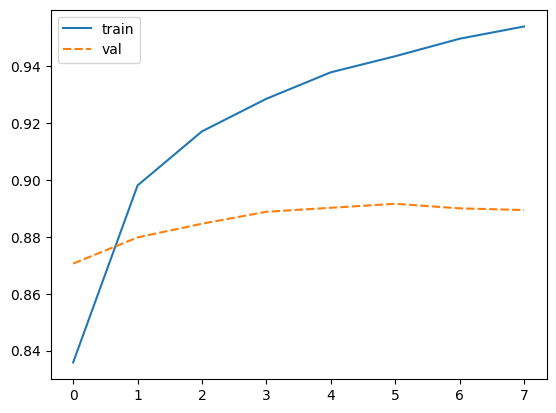

In [7]:
# Plot the learning curve
curve = pd.DataFrame({"train": history.history["accuracy"], "val": history.history["val_accuracy"]})
plot = sns.lineplot(data=curve)

In [8]:
# Evaluate on the test data
shallow.evaluate(test)

782/782 [==============================] - 5s 7ms/step - loss: 0.1784 - accuracy: 0.9435


[0.17840418219566345, 0.9435200095176697]

# Embedding network

In [10]:
# Design the network
#vocab list = 10000 aka input_dim
embedding = keras.models.Sequential([
  int_encoder,
  keras.layers.Embedding(input_dim = 10000, output_dim=32, mask_zero=True),
  keras.layers.GlobalAveragePooling1D(), # averages all the values in embedding column
  keras.layers.Dense(1,activation="sigmoid")
])

In [11]:
# Train the network
stopping = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
embedding.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
history = embedding.fit(train, epochs=100, validation_data=val, callbacks=[stopping], verbose=False)

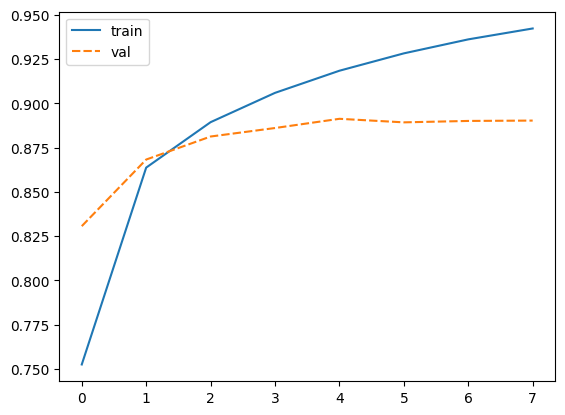

In [12]:
# Plot the learning curve
curve = pd.DataFrame({"train": history.history["accuracy"], "val": history.history["val_accuracy"]})
plot = sns.lineplot(data=curve)

In [13]:
# Evaluate on the test data
embedding.evaluate(test)

782/782 [==============================] - 5s 7ms/step - loss: 0.1850 - accuracy: 0.9334


[0.1849553883075714, 0.9333599805831909]

# Convolutional network

In [15]:
# Design the network
convolutional = keras.models.Sequential([
  int_encoder,
  keras.layers.Embedding(input_dim = 10000, output_dim=32, mask_zero=True),
  keras.layers.Conv1D(64, kernel_size=5, padding="valid", activation = "relu"), #kernal size = look at 5 words at a time
  keras.layers.GlobalAveragePooling1D(), # averages all the values in embedding column
  keras.layers.Dense(1,activation="sigmoid")
])

In [16]:
# Train the network
stopping = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
convolutional.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
history = convolutional.fit(train, epochs=100, validation_data=val, callbacks=[stopping], verbose=False)

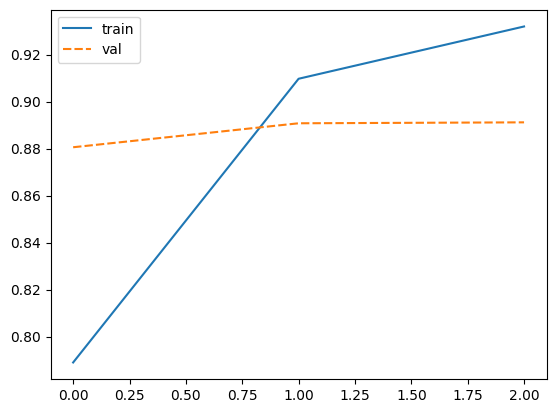

In [17]:
# Plot the learning curve
curve = pd.DataFrame({"train": history.history["accuracy"], "val": history.history["val_accuracy"]})
plot = sns.lineplot(data=curve)

In [18]:
# Evaluate on the test data
convolutional.evaluate(test)

782/782 [==============================] - 15s 19ms/step - loss: 0.2086 - accuracy: 0.9280


[0.20862571895122528, 0.9279999732971191]

# Recurrent network

In [19]:
# Design the network
recurrent = keras.models.Sequential([
  int_encoder,
  keras.layers.Embedding(input_dim = 10000, output_dim=32, mask_zero=True),
  keras.layers.LSTM(64), #looks for 64 patterns across entrire input
  keras.layers.Dense(1,activation="sigmoid")
])

In [20]:
# Train the network
stopping = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
recurrent.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
history = recurrent.fit(train, epochs=100, validation_data=val, callbacks=[stopping], verbose=False)

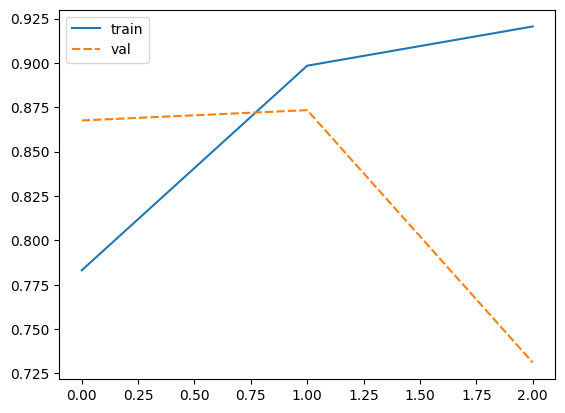

In [ ]:
# Plot the learning curve
curve = pd.DataFrame({"train": history.history["accuracy"], "val": history.history["val_accuracy"]})
plot = sns.lineplot(data=curve)

In [ ]:
# Evaluate on the test data
recurrent.evaluate(test)